In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
import tensorflow.keras.initializers as I
import tensorflow.keras.backend as K
from keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2,os
from PIL import Image, ImageOps
from google.colab.patches import cv2_imshow
import csv
import math
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score, ConfusionMatrixDisplay, recall_score
from tensorflow.keras.layers import BatchNormalization
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


.# **Melanoma Ham DATA (HAM10000)**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/melanoma/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
#I realize the last column being the label
y = data['label']
x = data.drop(columns = ['label'])
#get x_train ,y_train
x.shape

(10015, 2352)

# **Melanoma Meta DATA**

In [ ]:
other = pd.read_csv('/content/drive/MyDrive/Dataset/melanoma/HAM10000_metadata.csv')
other.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
#After review infomations of the data, I knew 'dx' column being diseases's name.

classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' Maligna Melanoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}


# **Unbalanced data DISTRIBUTION**

In [ ]:
k = y.map(classes.get)
k.value_counts() < 1000, k.value_counts() > 5000,k.value_counts()

(label
 (nv,  melanocytic nevi)                                      False
 (mel, melanoma)                                              False
 (bkl, benign keratosis-like lesions)                         False
 (bcc,  Maligna Melanoma)                                      True
 (akiec, Actinic keratoses and intraepithelial carcinomae)     True
 (vasc,  pyogenic granulomas and hemorrhage)                   True
 (df, dermatofibroma)                                          True
 Name: count, dtype: bool,
 label
 (nv,  melanocytic nevi)                                       True
 (mel, melanoma)                                              False
 (bkl, benign keratosis-like lesions)                         False
 (bcc,  Maligna Melanoma)                                     False
 (akiec, Actinic keratoses and intraepithelial carcinomae)    False
 (vasc,  pyogenic granulomas and hemorrhage)                  False
 (df, dermatofibroma)                                         False
 Name: 

# **Standardization and Splitting Data**

In [ ]:

# Convert your data and label lists to numpy arrays
data_np = np.array(x)
label_np = np.array(y)
# Reshape the data for oversampling
data_reshaped = data_np.reshape(data_np.shape[0], -1)


In [ ]:
x = (x-np.mean(data_reshaped))/np.std(data_reshaped)

In [ ]:
img_size=28

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)
X_train = X_train.astype('float32') / 255.
X_train = X_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(to_categorical(y_train.astype('float32')))

X_test = X_test.astype('float32') / 255.
X_test = X_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(to_categorical(y_test.astype('float32')))

# X_train= X_train[:8000]
# y_train= y_train[:8000]

print(X_train.shape)

(37548, 28, 28, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Original dataset shape Counter({4: 6705, 6: 1113, 2: 1099, 1: 514, 0: 327, 5: 142, 3: 115})
Resampled dataset shape Counter({2: 6705, 4: 6705, 3: 6705, 6: 6705, 5: 6705, 1: 6705, 0: 6705})


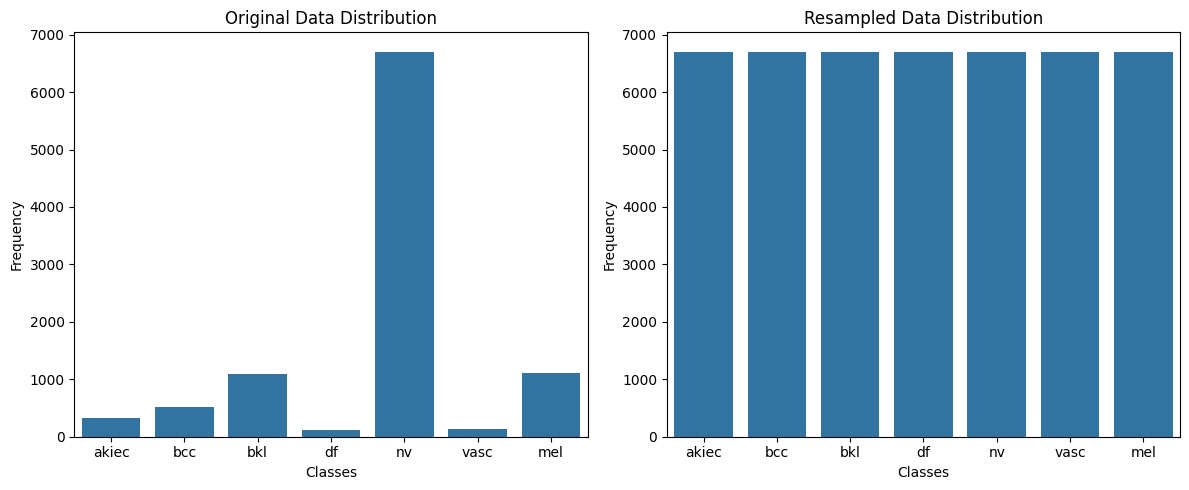

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt


# Reshape the data for oversampling
data_reshaped = data_np.reshape(data_np.shape[0], -1)

# Use RandomOverSampler for oversampling
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(data_reshaped, label_np)

# Reshape the data to its original shape
x_resampled = x_resampled.reshape(-1, 28, 28, 3)

print(f"Original dataset shape {Counter(label_np)}")
print(f"Resampled dataset shape {Counter(y_resampled)}")

# Define the ordering for the x-axis labels
order_labels = [0, 1, 2, 3, 4, 5, 6]
class_names = ['akiec', 'bcc', 'bkl', 'df','nv','vasc','mel' ]
# classes = {4: ('nv', ' melanocytic nevi'),
#            6: ('mel', 'melanoma'),
#            2 :('bkl', 'benign keratosis-like lesions'),
#            1:('bcc' , ' Maligna Melanoma'),
#            5: ('vasc', ' pyogenic granulomas and hemorrhage'),
#            0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
#            3: ('df', 'dermatofibroma')}

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=label_np, order=order_labels)
plt.title("Original Data Distribution")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(ticks=order_labels, labels=class_names)  # Setting the x-axis tick labels


# Plot the resampled data distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, order=order_labels)
plt.title("Resampled Data Distribution")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(ticks=order_labels, labels=class_names)  # Setting the x-axis tick labels

plt.tight_layout()
plt.show()



# oversample = RandomOverSampler()
# x,y  = oversample.fit_resample(x,y)
# x = np.array(x).reshape(-1,28,28,3)
# print('Shape of Data :',x.shape)

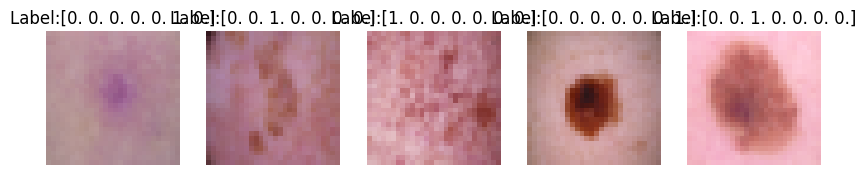

In [ ]:
# f , ax = plt.subplots(2,5)
# f.set_size_inches(10, 10)
# k = 0
# for i in range(2):
#     for j in range(5):
#         ax[i,j].imshow(x[k])
#         k = k + 1
#     plt.tight_layout()
n_samples=5
plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = X_train[index]
    plt.imshow(sample_image, cmap="binary")
    plt.title("Label:" + str(y_train[index]))
    plt.axis("off")

plt.show()

# **MODEL**

In [ ]:
# x_train = X_train.astype('float32') / 255.
# x_train = x_train.reshape(-1, img_size, img_size, 3)
# y_train = np.array(to_categorical(y_train.astype('float32')))

# x_test = X_test.astype('float32') / 255.
# x_test = x_test.reshape(-1, img_size, img_size, 3)
# y_test = np.array(to_categorical(y_test.astype('float32')))
# print(x_train.shape)

In [ ]:
#Define the range of batch size for network
def find_factors(n):
    factors = []
    for i in range(1, n + 1):
        if n % i == 0:
            factors.append(i)
    return factors


print(find_factors(X_train.shape[0]))

[1, 2, 3, 4, 6, 7, 9, 12, 14, 18, 21, 28, 36, 42, 63, 84, 126, 149, 252, 298, 447, 596, 894, 1043, 1341, 1788, 2086, 2682, 3129, 4172, 5364, 6258, 9387, 12516, 18774, 37548]


In [ ]:
# Making capsule layer from scratch
class CapsuleLayer(L.Layer):
    def __init__(self, num_capsule, dim_capsule, routing=3, kernel_initializer='glorot_uniform', **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routing = routing
        self.kernel_initializer = kernel_initializer

    def build(self, input_shape):
        assert len(input_shape) >= 3
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]

        # transforming the matrix
        self.W = self.add_weight(
            shape=[self.num_capsule, self.input_num_capsule, self.dim_capsule, self.input_dim_capsule],
            initializer=self.kernel_initializer, name='w')
        self.built = True

    def call(self, inputs, training=None):
        input_expand = tf.expand_dims(tf.expand_dims(inputs, 1), -1)
        inputs_tiled = K.tile(input_expand, [1, self.num_capsule, 1, 1, 1])
        input_hat = tf.squeeze(tf.map_fn(lambda x: tf.matmul(self.W, x), elems=inputs_tiled))
        # b = tf.zeros(shape=[inputs.shape[0], self.num_capsule, 1, self.input_num_capsule])
        b = tf.zeros(shape=[tf.shape(inputs)[0], self.num_capsule, 1, self.input_num_capsule])

        assert self.routing > 0
        for i in range(self.routing):
            c = tf.nn.softmax(b, axis=1)
            output = squash(tf.matmul(c, input_hat))
            if i < self.routing - 1:
                b += tf.matmul(output, input_hat, transpose_b=True)
        return tf.squeeze(output)

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsule, self.dim_capsule])

    def get_config(self):
        config = {
            'num_capsule': self.num_capsule,
            'dim_capsule': self.dim_capsule,
            'routings': self.routings
        }
        base_config = super(CapsuleLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
# Makign the squash function
def squash(vectors, axis=-1):
    squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = squared_norm / (1 + squared_norm) / (K.sqrt(squared_norm) + K.epsilon())
    return scale * vectors

In [ ]:

from keras.src.layers import MaxPooling2D
from keras.src.layers.regularization.dropout import Dropout
batch_size = 21

img_shape = (img_size, img_size, 3)

# # Define a custom input layer with a hardcoded batch size
input_layer = L.Input(batch_shape=(batch_size,) + img_shape)


from tensorflow.keras.layers import DepthwiseConv2D, GlobalAveragePooling2D, Reshape, Multiply

def powerfeature(input_layer, num_layers, expansion_factor, reduction_factor=0.9):

    x = L.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(input_layer)
    x = L.Dropout(0.2)(x)
    x = L.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = L.MaxPooling2D((2, 2))(x)

    x = L.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = L.Dropout(0.3)(x)
    x = L.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = L.MaxPooling2D((2, 2))(x)


    for _ in range(num_layers):
        x1 = L.Conv2D(2 * expansion_factor, (3, 3), kernel_initializer='he_normal', padding='same')(x)
        x1 = L.Dropout(0.2)(x1)
        x1 = L.Conv2D(expansion_factor, (3, 3), kernel_initializer='he_normal', padding='same')(x1)
        x = L.Concatenate()([x, x1])


    # Attention Mechanism
    attention = GlobalAveragePooling2D()(x)
    attention = Reshape((1, 1, K.int_shape(x)[-1]))(attention)
    attention = L.Conv2D(K.int_shape(x)[-1] // 16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(attention)
    attention = L.Conv2D(K.int_shape(x)[-1], (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(attention)
    x = Multiply()([x, attention])


 # Transition Mechanism
    contracted_filters = int(K.int_shape(x)[-1] * reduction_factor)

    x = L.Conv2D(contracted_filters, (3, 3), kernel_initializer='he_normal', padding='same')(x)
    x = L.Dropout(0.5)(x)
    x = L.Conv2D(contracted_filters, (3, 3), kernel_initializer='he_normal', padding='same')(x)
    x = L.MaxPooling2D((2, 2))(x)

    return x


x = powerfeature(input_layer,num_layers=2, expansion_factor=4)



#Primary Capsule Layer
conv2 = L.Conv2D(filters=8 * 16, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
reshape2 = L.Reshape([-1, 8])(conv2)  # Reduce dimensions here
squashed_output = L.Lambda(squash)(reshape2)


In [ ]:
heelcaps = CapsuleLayer(num_capsule=7, dim_capsule=16, routing=3, name='heelcaps')(squashed_output)

In [ ]:
# Making length layer which will calculate the length of the vectors
class Length(L.Layer):
    def call(self, inputs, **kwargs):
        return tf.sqrt(tf.reduce_sum(tf.square(inputs), -1))

    def compute_output_shape(self, input_shape):
        return input_shape[:-1]

    def get_config(self):
        config = super(Length, self).get_config()
        return config

In [ ]:
out_caps = Length(name='capsnet')(heelcaps)

In [ ]:
# Making the masking layer
class Mask(L.Layer):
    def call(self, inputs, **kwargs):
        if type(inputs) is list:
            assert len(inputs) == 2
            inputs, mask = inputs
        else:
            x = tf.sqrt(tf.reduce_sum(tf.square(inputs), -1))
            mask = tf.one_hot(indices=tf.argmax(x, 1), depth=x.shape[1])
        masked = K.batch_flatten(inputs * tf.expand_dims(mask, -1))
        return masked

    def compute_output_shape(self, input_shape):
        if type(input_shape[0]) is tuple:  # true label provided
            return tuple([None, input_shape[0][1] * input_shape[0][2]])
        else:  # no true label provided
            return tuple([None, input_shape[1] * input_shape[2]])

    def get_config(self):
        config = super(Mask, self).get_config()
        return config

In [ ]:
y = L.Input(shape=(7,))
print(y.shape)
print(heelcaps.shape)
masked_by_y = Mask()([heelcaps, y])  # The true label is used to mask the output of capsule layer. For training
print(masked_by_y.shape)
masked = Mask()(heelcaps)
print(masked.shape)

(None, 7)
(None, 7, 16)
(None, 112)
(None, 112)


In [ ]:
input_shape = X_train.shape[1:]
decoder = M.Sequential(name='decoder')
decoder.add(L.Dense(512, activation='relu', input_dim=16 * 7))
decoder.add(L.Dense(1024, activation='relu'))
decoder.add(L.Dense(img_size * img_size * 3, activation='softmax'))
decoder.add(L.Reshape(target_shape=input_shape, name='out_recon'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Making models
train_model = M.Model([input_layer, y], [out_caps, decoder(masked_by_y)])
eval_model = M.Model(input_layer, [out_caps, decoder(masked)])

In [ ]:
# Making the loss function
def margin_loss(y_true, y_pred):
    L = y_true * tf.square(tf.maximum(0., 0.9 - y_pred)) + \
        0.5 * (1 - y_true) * tf.square(tf.maximum(0., y_pred - 0.1))
    return tf.reduce_mean(tf.reduce_sum(L, 1))

In [ ]:
train_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (21, 28, 28, 3)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (21, 28, 28, 64)       │          1,792 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (21, 28, 28, 64)       │              0 │ conv2d_13[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (21, 28, 28, 64)       │         36,928 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (21, 14, 14, 64)       │              0 │ conv2d_14[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (21, 14, 14, 128)      │         73,856 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (21, 14, 14, 128)      │              0 │ conv2d_15[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (21, 14, 14, 128)      │        147,584 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (21, 7, 7, 128)        │              0 │ conv2d_16[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (21, 7, 7, 8)          │          9,224 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (21, 7, 7, 8)          │              0 │ conv2d_17[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (21, 7, 7, 4)          │            292 │ dropout_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (21, 7, 7, 132)        │              0 │ max_pooling2d_4[0][0], │
│ (Concatenate)             │                        │                │ conv2d_18[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (21, 7, 7, 8)          │          9,512 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (21, 7, 7, 8)          │              0 │ conv2d_19[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (21, 7, 7, 4)          │            292 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (21, 7, 7, 136)        │              0 │ concatenate_2[0][0],   │
│ (Concatenate)             │                        │                │ conv2d_20[0][0]        │
├──────────────────────

 Total params: 3,774,720 (14.40 MB)

 Trainable params: 3,774,720 (14.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_model.save_weights('/content/drive/MyDrive/models/ACT_Caps_Melanoma_HybridCAPSNET_model.weights.h5')
train_model.load_weights('/content/drive/MyDrive/models/ACT_Caps_Melanoma_HybridCAPSNET_model.weights.h5')


In [ ]:
n_samples = 5
# plt.figure(figsize=(n_samples * 2, 3))
# for index in range(n_samples):
#     plt.subplot(1, n_samples, index + 1)
#     sample_image = x_test[index]
#     plt.imshow(sample_image, cmap="binary")
#     plt.title("Label:" + str(y_test[index]))
#     plt.axis("off")

# plt.show()

In [ ]:









       m = batch_size
epochs = 120
# Using EarlyStopping, end training when val_accuracy is not improved for 10 consecutive times
early_stopping = keras.callbacks.EarlyStopping(monitor='val_capsnet_accuracy', mode='max',
                                               patience=2, restore_best_weights=True)

In [ ]:
print(X_train.shape)  # should be (num_samples, 28, 28, 1) or something similar
print(y_train.shape)  # should be (num_samples, 3) given your model summary
print(X_test.shape)   # should be (num_test_samples, 28, 28, 1) or similar
print(y_test.shape)   # should be (num_test_samples, 3)

(37548, 28, 28, 3)
(37548, 7)
(9387, 28, 28, 3)
(9387, 7)


In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_capsnet_accuracy', mode='max', factor=0.5, patience=10)
train_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss=[margin_loss, 'mse'],
    loss_weights=[1., 0.0005],
    metrics={'capsnet': 'accuracy', 'decoder': 'mse'}
)

# Assuming x_train, y_train, x_test, y_test, m, and epochs are defined elsewhere
history = train_model.fit(
    [X_train, y_train], [y_train, X_train],
    batch_size=m,
    epochs=epochs,
    validation_data=([X_test, y_test], [y_test, X_test])
    # , callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/120
1788/1788 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - capsnet_accuracy: 0.2883 - capsnet_loss: 0.4269 - decoder_loss: 2.1939e-04 - decoder_mse: 0.4388 - loss: 0.4272 - val_capsnet_accuracy: 0.5142 - val_capsnet_loss: 0.3013 - val_decoder_loss: 2.1940e-04 - val_decoder_mse: 0.4388 - val_loss: 0.3015
Epoch 2/120
1788/1788 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - capsnet_accuracy: 0.6133 - capsnet_loss: 0.2547 - decoder_loss: 2.1891e-04 - decoder_mse: 0.4378 - loss: 0.2549 - val_capsnet_accuracy: 0.7404 - val_capsnet_loss: 0.1819 - val_decoder_loss: 2.1940e-04 - val_decoder_mse: 0.4388 - val_loss: 0.1821
Epoch 3/120
1788/1788 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - capsnet_accuracy: 0.7468 - capsnet_loss: 0.1766 - decoder_loss: 2.1928e-04 - decoder_mse: 0.4386 - loss: 0.1768 - val_capsnet_accuracy: 0.8082 - val_capsnet_loss: 0.1322 - val_decoder_loss: 2.1940e-04 - val_decoder_mse: 0.4388 - val_loss: 0.1324
Epoch 4/120
1788/1788 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - capsnet_accuracy: 0.8197 -

In [ ]:
evaluation_results = train_model.evaluate([X_test, y_test], [y_test, X_test], batch_size=m, verbose=0)
# print("Test Loss:", evaluation_results[0])
# print("Test Accuracy:", evaluation_results[3])

test_loss = evaluation_results[0]
test_accuracy = evaluation_results[3]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Loss: 0.0133
Test Accuracy: 98.43%


# **Plot Accuracy and Loss**

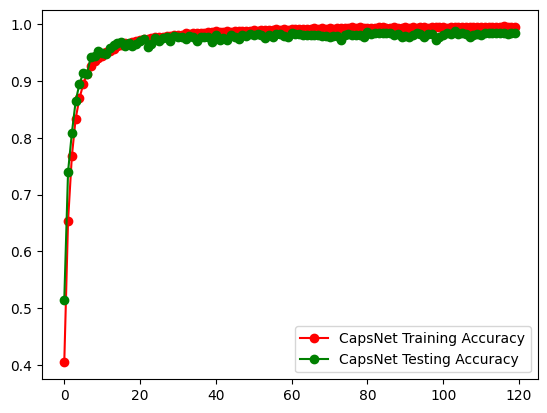

In [ ]:
plt.plot(history.history["capsnet_accuracy"] , 'ro-' , label = "CapsNet Training Accuracy")
plt.plot(history.history["val_capsnet_accuracy"] , 'go-' , label = "CapsNet Testing Accuracy")
plt.legend()
plt.show()

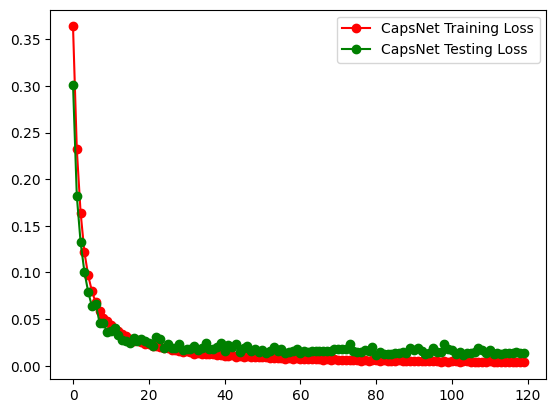

In [ ]:
plt.plot(history.history["loss"] , 'ro-' , label = "CapsNet Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "CapsNet Testing Loss")
plt.legend()
plt.show()

In [ ]:
y_pred_list = train_model.predict([X_test, y_test], batch_size=m, verbose=0)  # Providing both image and label data
y_pred_capsnet = y_pred_list[0]   # Getting the output from the capsnet layer
y_pred_labels = np.argmax(y_pred_capsnet, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print(y_pred_labels.shape)


(9387,)


In [ ]:
target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(y_test_labels, y_pred_labels, target_names=target_names))

                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       1.00      1.00      1.00      1295
                                 ('bcc', ' Maligna Melanoma')       0.99      1.00      0.99      1323
                     ('bkl', 'benign keratosis-like lesions')       0.96      1.00      0.98      1351
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1392
                                  ('nv', ' melanocytic nevi')       0.99      0.90      0.95      1346
              ('vasc', ' pyogenic granulomas and hemorrhage')       0.99      1.00      1.00      1292
                                          ('mel', 'melanoma')       0.97      0.99      0.98      1388

                                                     accuracy                           0.98      9387
                                                    macro avg       0.9

447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
A.I predicts: akiec


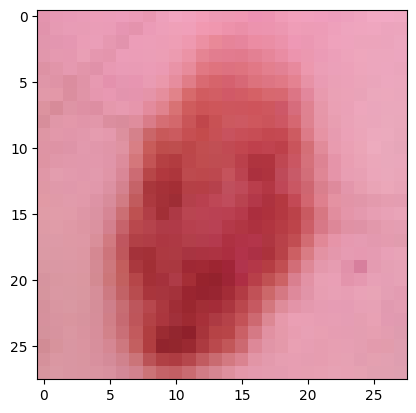

In [ ]:
categories=['akiec','bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']

from keras.models import Model
simplified_model = Model(inputs=train_model.input, outputs=train_model.get_layer('capsnet').output)
y_pred_capsnet = simplified_model.predict([X_test, y_test], batch_size=m)
y_pred_labels = np.argmax(y_pred_capsnet, axis=1)

X = 150

# Preprocessing the image
img_single = X_test[X]
img_single_exp = np.expand_dims(img_single, 0)
img_single_exp = img_single_exp.reshape(img_single_exp.shape[0], img_size, img_size, 3)

# Ensure y_test is 2D (like one-hot encoded labels)
if len(y_test.shape) != 2:
    print("y_test doesn't have two dimensions. Please check its shape!")
else:
    # Creating a dummy label to make a prediction since our model expects 2 inputs
    dummy_label = np.zeros((1, y_test.shape[1]))

    # Making the prediction for the single image
    # predictions_list = train_model.predict([img_single_exp, dummy_label])


    predictions_single = y_pred_labels[0]  # Extracting capsnet predictions

        # Ensure the predicted category index doesn't exceed the categories list length
    predicted_index = np.argmax(predictions_single)
    if predicted_index >= len(categories):
        print("Predicted index out of range for categories list!")
    else:
        print('A.I predicts:', categories[predicted_index])

# Visualizing the preprocessed image
plt.imshow(np.squeeze(img_single_exp), cmap='gray')
plt.grid(False)
plt.show()


In [ ]:
from keras.models import Model
simplified_model = Model(inputs=train_model.input, outputs=train_model.get_layer('capsnet').output)
y_pred_capsnet = simplified_model.predict([X_test, y_test], batch_size=m)
y_pred_labels = np.argmax(y_pred_capsnet, axis=1)



447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


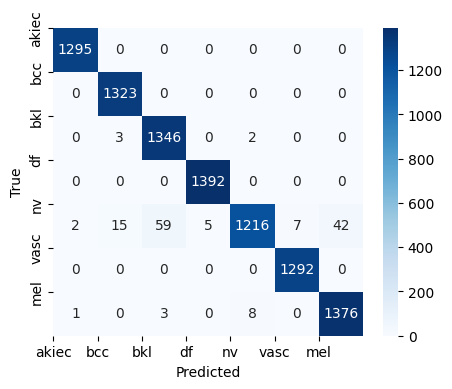

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

if y_test.shape[1] > 1:  # This checks if y_test is one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(7), ['akiec','bcc', 'bkl', 'df', 'nv', 'vasc', 'mel'], fontsize=10)
plt.yticks(range(7),  ['akiec','bcc', 'bkl', 'df', 'nv', 'vasc', 'mel'], fontsize=10)
plt.show()

classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' Maligna Melanoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}


In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from keras.models import Model
num_classes=7
# Assuming train_model is correctly defined
simplified_model = Model(inputs=train_model.input, outputs=train_model.get_layer('capsnet').output)
y_pred_probs = simplified_model.predict([X_test, y_test], batch_size=batch_size)

# Convert y_test to one-hot encoded format
Y_test_1hot = label_binarize(y_test, classes=range(num_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_1hot[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


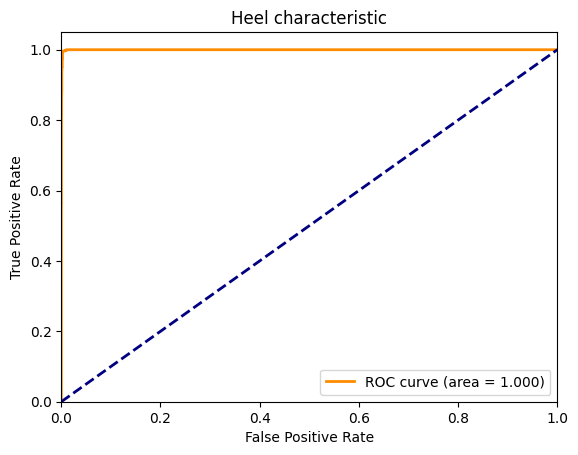

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heel characteristic')
plt.legend(loc="lower right")
plt.show()